<a id='top of notebook'></a>

# Pretty Plotting with Python and Pandas: Dog Licenses in NYC

Data from: https://data.cityofnewyork.us/Health/NYC-Dog-Licensing-Dataset/nu7n-tubp

Notebook by: Nora Stack

Date Created: January 3, 2020

Date Edited: January 31, 2020

__This notebook is designed to highlight some shortcomings of default matplotlib plots and some ways to improve plots with matplotlib options and seaborn. Additionally, we will look at some other packages like geopandas.__

We will:

1. Import data from CSV file to Pandas dataframe
2. Clean data if necessary
3. Visualize data

_Notes:_ nbextensions for jupyter notebooks: https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/install.html 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Import-the-Data-(CSV-file)" data-toc-modified-id="Import-the-Data-(CSV-file)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import the Data (CSV file)</a></span></li><li><span><a href="#Do-we-need-to-clean-the-data?" data-toc-modified-id="Do-we-need-to-clean-the-data?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Do we need to clean the data?</a></span><ul class="toc-item"><li><span><a href="#Is-Paige-the-American-Pit-Bull-Mix-registered-twice-(overlapping-LicenseIssuedDate)?" data-toc-modified-id="Is-Paige-the-American-Pit-Bull-Mix-registered-twice-(overlapping-LicenseIssuedDate)?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Is Paige the American Pit Bull Mix registered twice (overlapping LicenseIssuedDate)?</a></span></li><li><span><a href="#Did-we-overclean?-Let's-discuss..." data-toc-modified-id="Did-we-overclean?-Let's-discuss...-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Did we overclean? Let's discuss...</a></span></li><li><span><a href="#Suspicious-that--there-is-a-male-Siberian-Husky-named-Jedi-that-is-born-in-2015-witht-the-zipcode-11219-that-repeats-in-the-data?-Should-we-remove-similar-rows?" data-toc-modified-id="Suspicious-that--there-is-a-male-Siberian-Husky-named-Jedi-that-is-born-in-2015-witht-the-zipcode-11219-that-repeats-in-the-data?-Should-we-remove-similar-rows?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Suspicious that  there is a male Siberian Husky named Jedi that is born in 2015 witht the zipcode 11219 that repeats in the data? Should we remove similar rows?</a></span></li><li><span><a href="#Fun-other-tests" data-toc-modified-id="Fun-other-tests-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Fun other tests</a></span></li></ul></li><li><span><a href="#Visualizations" data-toc-modified-id="Visualizations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualizations</a></span><ul class="toc-item"><li><span><a href="#Line-Plot:-Registrations-per-Day" data-toc-modified-id="Line-Plot:-Registrations-per-Day-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Line Plot: Registrations per Day</a></span></li><li><span><a href="#Scatter-Plot:-Popularity-of-dog-breeds" data-toc-modified-id="Scatter-Plot:-Popularity-of-dog-breeds-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Scatter Plot: Popularity of dog breeds</a></span></li><li><span><a href="#Bar-Chart:-Popularity-of-dog-names" data-toc-modified-id="Bar-Chart:-Popularity-of-dog-names-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Bar Chart: Popularity of dog names</a></span></li><li><span><a href="#Boxplot:-dog-ages" data-toc-modified-id="Boxplot:-dog-ages-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Boxplot: dog ages</a></span></li><li><span><a href="#Choropleth-Map:-Number-of-dogs-by-zipcode" data-toc-modified-id="Choropleth-Map:-Number-of-dogs-by-zipcode-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Choropleth Map: Number of dogs by zipcode</a></span></li></ul></li></ul></div>

## Import Libraries

In [388]:
# import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pandas_profiling


In [214]:
# set pandas options
pd.set_option('display.max_colwidth', -1)
pd.set_option("display.max_rows", 101)

<a href='#top of notebook'>Return to the top of the notebook.</a>

## Import the Data (CSV file)

In [215]:
# import data
dog_df=pd.read_csv("NYC_Dog_Licensing_Dataset.csv")

In [216]:
# view first 5 rows of data
dog_df.head()

,RowNumber,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year
0,1,PAIGE,F,2014,American Pit Bull Mix / Pit Bull Mix,NaN,10035,09/12/2014,09/12/2017,2016
1,2,YOGI,M,2010,Boxer,NaN,10465,09/12/2014,10/02/2017,2016
2,3,ALI,M,2014,Basenji,NaN,10013,09/12/2014,09/12/2019,2016
3,4,QUEEN,F,2013,Akita Crossbreed,NaN,10013,09/12/2014,09/12/2017,2016
4,5,LOLA,F,2009,Maltese,NaN,10028,09/12/2014,10/09/2017,2016


In [217]:
# dataframe columns
dog_df.columns

Index(['RowNumber', 'AnimalName', 'AnimalGender', 'AnimalBirthMonth',
       'BreedName', 'Borough', 'ZipCode', 'LicenseIssuedDate',
       'LicenseExpiredDate', 'Extract Year'],
      dtype='object')

In [218]:
# dataframe types
dog_df.dtypes

RowNumber             int64  
AnimalName            object 
AnimalGender          object 
AnimalBirthMonth      int64  
BreedName             object 
Borough               float64
ZipCode               int64  
LicenseIssuedDate     object 
LicenseExpiredDate    object 
Extract Year          int64  
dtype: object

In [219]:
# convert dates to datetime_format
dog_df['LicenseIssuedDate']=pd.to_datetime(dog_df['LicenseIssuedDate'], infer_datetime_format=True)
dog_df['LicenseExpiredDate']=pd.to_datetime(dog_df['LicenseExpiredDate'], infer_datetime_format=True)

In [220]:
dog_df.dtypes

RowNumber             int64         
AnimalName            object        
AnimalGender          object        
AnimalBirthMonth      int64         
BreedName             object        
Borough               float64       
ZipCode               int64         
LicenseIssuedDate     datetime64[ns]
LicenseExpiredDate    datetime64[ns]
Extract Year          int64         
dtype: object

In [221]:
# pandas profiling on potentially dirty data but this takes forever to run but is cool.

#pandas_profiling.ProfileReport(dog_df)

<a href='#top of notebook'>Return to the top of the notebook.</a>

## Do we need to clean the data?

In [222]:
# remove unnecessary RowNumber column
dog_df.drop(columns=['RowNumber'], inplace=True)

In [223]:
# show data
dog_df.head()

,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year
0,PAIGE,F,2014,American Pit Bull Mix / Pit Bull Mix,NaN,10035,2014-09-12,2017-09-12,2016
1,YOGI,M,2010,Boxer,NaN,10465,2014-09-12,2017-10-02,2016
2,ALI,M,2014,Basenji,NaN,10013,2014-09-12,2019-09-12,2016
3,QUEEN,F,2013,Akita Crossbreed,NaN,10013,2014-09-12,2017-09-12,2016
4,LOLA,F,2009,Maltese,NaN,10028,2014-09-12,2017-10-09,2016


<a href='#top of notebook'>Return to the top of the notebook.</a>

### Is Paige the American Pit Bull Mix registered twice (overlapping LicenseIssuedDate)?

In [224]:
# All the Paiges
dog_df[dog_df.AnimalName=='PAIGE']

,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year
0,PAIGE,F,2014,American Pit Bull Mix / Pit Bull Mix,NaN,10035,2014-09-12,2017-09-12,2016
23337,PAIGE,F,2011,American Pit Bull Terrier/Pit Bull,NaN,11417,2015-08-14,2016-08-14,2016
24918,PAIGE,F,2007,Labrador Retriever,NaN,11217,2015-08-31,2017-08-31,2016
32671,PAIGE,F,2015,Labrador Retriever,NaN,10025,2015-11-27,2016-11-27,2016
43329,PAIGE,F,2013,Shih Tzu,NaN,11224,2016-02-12,2017-04-02,2016
61438,PAIGE,F,2010,Labrador Retriever,NaN,11360,2016-05-06,2018-06-30,2016
68428,PAIGE,F,2006,Labrador Retriever,NaN,11216,2016-06-05,2017-06-05,2016
69875,PAIGE,F,2015,American Pit Bull Mix / Pit Bull Mix,NaN,11365,2016-06-10,2017-06-10,2016
70160,PAIGE,F,2013,"Dachshund, Long Haired Miniature",NaN,10044,2016-06-12,2017-06-12,2016
73534,PAIGE,F,2016,Labrador Retriever Crossbreed,NaN,10016,2016-06-26,2017-06-26,2016


In [225]:
# Let's be more specific and search for Paige using all her data except Extract_Year
dog_df[(dog_df.AnimalName=='PAIGE') & (dog_df.AnimalGender=='F') & (dog_df.AnimalBirthMonth==2014) & (dog_df.BreedName=='American Pit Bull Mix / Pit Bull Mix')]

,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year
0,PAIGE,F,2014,American Pit Bull Mix / Pit Bull Mix,NaN,10035,2014-09-12,2017-09-12,2016
112719,PAIGE,F,2014,American Pit Bull Mix / Pit Bull Mix,NaN,10035,2014-09-12,2017-09-12,2017


In [226]:
# How can we remove entries that are the same except for the ExtractYear?

In [227]:
# drop rows if they are duplicated in all fields but extract year
dog_clean_df=dog_df.drop_duplicates(['AnimalName', 'AnimalGender', 'AnimalBirthMonth', 'BreedName',
       'Borough', 'ZipCode', 'LicenseIssuedDate', 'LicenseExpiredDate'],keep= 'last')

In [228]:
# Print change in size of dfs
print("size of original df: ", dog_df.size)
print("size of cleaned df: ", dog_clean_df.size)

size of original df:  3111543
size of cleaned df:  2321856


In [229]:
# do we only have one entry for Paige?
dog_clean_df[(dog_clean_df.AnimalName=='PAIGE') & (dog_clean_df.AnimalGender=='F') & (dog_clean_df.AnimalBirthMonth==2014) & (dog_clean_df.BreedName=='American Pit Bull Mix / Pit Bull Mix')]

,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year
112719,PAIGE,F,2014,American Pit Bull Mix / Pit Bull Mix,NaN,10035,2014-09-12,2017-09-12,2017


<a href='#top of notebook'>Return to the top of the notebook.</a>

### Did we overclean? Let's discuss...

In [230]:
# Let's look at dog names

In [231]:
dog_clean_df.AnimalName.value_counts()

UNKNOWN              3811
BELLA                2923
NAME NOT PROVIDED    2746
MAX                  2719
CHARLIE              2136
                     ... 
BYNO                 1   
SMARTY               1   
BENJALS              1   
REBEKAH              1   
DELGATTO             1   
Name: AnimalName, Length: 22261, dtype: int64

In [232]:
# Let's get rid of 'UNKNOWN' and 'NAME NOT PROVIDED'
unknown_df=dog_clean_df[(dog_clean_df["AnimalName"]=='UNKNOWN') 
            | (dog_clean_df["AnimalName"]=='NAME NOT PROVIDED' ) ].index

In [233]:
# remove the dogs with'UNKNOWN' and 'NAME NOT PROVIDED' names
dog_clean_df.drop(unknown_df , inplace=True)

In [234]:
dog_clean_df.dropna()

,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year


In [235]:
dog_clean_df.AnimalName.value_counts()

BELLA       2923
MAX         2719
CHARLIE     2136
COCO        1990
ROCKY       1841
            ... 
VIOLETT     1   
BYNO        1   
SMARTY      1   
BENJALS     1   
DELGATTO    1   
Name: AnimalName, Length: 22259, dtype: int64

In [236]:
# add a count of how many times each dog name appears in the data
name_count_df=dog_clean_df.AnimalName.value_counts()
name_count_df=name_count_df.rename_axis('AnimalName').reset_index(name='name_count') 
name_count_df.head()

,AnimalName,name_count
0,BELLA,2923
1,MAX,2719
2,CHARLIE,2136
3,COCO,1990
4,ROCKY,1841


Max is the second most popular dog name in NYC!

In [237]:
# lets merge aka join this name_count_df to all dog_clean_df
dog_clean_df = dog_clean_df.merge(name_count_df,on='AnimalName',how='left')

In [238]:
dog_clean_df.head()

,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year,name_count
0,YOGI,M,2010,Boxer,NaN,10465,2014-09-12,2017-10-02,2016,195.0
1,QUEEN,F,2013,Akita Crossbreed,NaN,10013,2014-09-12,2017-09-12,2016,54.0
2,LOLA,F,2009,Maltese,NaN,10028,2014-09-12,2017-10-09,2016,1833.0
3,HEIDI-BO,F,2007,Dachshund Smooth Coat,NaN,11215,2014-09-13,2017-04-16,2016,2.0
4,MASSIMO,M,2009,"Bull Dog, French",NaN,11201,2014-09-13,2017-09-17,2016,30.0


In [239]:
dog_clean_df[dog_clean_df['name_count']==1].head()

,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year,name_count
72,EVEYLYN,F,2008,French Bulldog,NaN,10011,2014-09-23,2016-09-23,2016,1.0
91,AJAXX,M,2014,Miniature Pinscher,NaN,11222,2014-09-28,2016-09-28,2016,1.0
133,SENSATION,F,2014,Mastiff,NaN,10035,2014-10-05,2016-10-05,2016,1.0
135,TEMPTATION,M,2014,Mastiff,NaN,10035,2014-10-05,2016-10-05,2016,1.0
148,CUSHI,M,2011,Yorkshire Terrier,NaN,11372,2014-10-07,2016-02-17,2016,1.0


In [240]:
# Does Eugene's doggie have a unique name and breed combination?
dog_clean_df["AnimalName"][(dog_clean_df['AnimalName']=='LUNA') & (dog_clean_df['BreedName']=='Miniature Dachshund')].count()

0

Luna is unique!

In [241]:
# Does Nora's doggie have a unique name and breed combination?
dog_clean_df[(dog_clean_df['AnimalName']=='JEDI') & \
             (dog_clean_df['BreedName']=='American Pit Bull Mix / Pit Bull Mix')].head()

,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year,name_count


Jedi is also unique!

In [242]:
# Does Nora's doggie have a unique name?
dog_clean_df[dog_clean_df['AnimalName']=='JEDI'].head(21)

,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year,name_count
3152,JEDI,F,2010,Chihuahua,NaN,11235,2015-02-11,2016-02-11,2016,20.0
21584,JEDI,M,2007,Shih Tzu,NaN,10460,2015-09-30,2017-10-27,2016,20.0
22144,JEDI,M,2012,Unknown,NaN,10025,2015-10-08,2016-09-04,2016,20.0
29096,JEDI,F,2005,Maltese,NaN,10458,2016-01-12,2016-09-30,2016,20.0
38024,JEDI,M,2015,Siberian Husky,NaN,11219,2016-04-02,2017-04-02,2016,20.0
45915,JEDI,M,2008,Golden Retriever,NaN,10024,2016-06-01,2017-05-04,2016,20.0
81716,JEDI,M,2002,Beagle,NaN,11372,2016-05-19,2017-05-21,2017,20.0
87914,JEDI,M,2012,Border Collie,NaN,10462,2016-08-03,2017-08-03,2017,20.0
99350,JEDI,M,2008,Unknown,NaN,11367,2016-12-23,2018-03-04,2017,20.0
104860,JEDI,M,2015,Siberian Husky,NaN,11219,2017-03-02,2018-04-02,2017,20.0


<a href='#top of notebook'>Return to the top of the notebook.</a>

### Suspicious that  there is a male Siberian Husky named Jedi that is born in 2015 witht the zipcode 11219 that repeats in the data? Should we remove similar rows?

In [243]:
# Let's be more specific and search for Jedi the Siberian Husky
dog_df[(dog_df.AnimalName=='JEDI') & (dog_df.AnimalGender=='M') & (dog_df.AnimalBirthMonth==2015) & \
       (dog_df.BreedName=='Siberian Husky')]

,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year
53573,JEDI,M,2015,Siberian Husky,NaN,11219,2016-04-02,2017-04-02,2016
164102,JEDI,M,2015,Siberian Husky,NaN,11219,2017-03-02,2018-04-02,2017
289845,JEDI,M,2015,Siberian Husky,NaN,11219,2018-03-20,2020-04-02,2018


In [244]:
# Let's be more specific and search for Jedi the Shih Tzu
dog_df[(dog_df.AnimalName=='JEDI') & (dog_df.AnimalGender=='M') & (dog_df.AnimalBirthMonth==2007) & \
       (dog_df.BreedName=='Shih Tzu')]

,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year
27593,JEDI,M,2007,Shih Tzu,NaN,10460,2015-09-30,2017-10-27,2016
211303,JEDI,M,2007,Shih Tzu,NaN,10460,2017-09-27,2018-10-27,2017
339617,JEDI,M,2007,Shih Tzu,NaN,10460,2018-11-26,2019-10-27,2018


In [245]:
# Notice that the LicenseExpiredDate occurs on the same month and day every year....

# Should we filter the data with some condition on duplicate fields and duplocaite month/day LicenseExpiredDate?

In [246]:
# Well what if we look at Bella's

In [247]:
# Bella dataframe
dog_clean_df[dog_clean_df['AnimalName']=='BELLA'].BreedName.value_counts()

Unknown                      387
Yorkshire Terrier            286
Shih Tzu                     243
Maltese                      138
Chihuahua                    132
                            ... 
American Foxhound            1  
Portuguese Water Dog         1  
Pharaoh Hound                1  
Schnauzer Crossbreed         1  
Cocker Spaniel Crossbreed    1  
Name: BreedName, Length: 147, dtype: int64

In [248]:
bella_unknown_df=dog_clean_df[(dog_clean_df['AnimalName']=='BELLA') & (dog_clean_df['BreedName']=='Unknown')]
bella_unknown_df.head()

,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year,name_count
3633,BELLA,F,2013,Unknown,NaN,11215,2015-02-18,2016-02-18,2016,2923.0
3959,BELLA,F,2014,Unknown,NaN,10463,2015-02-23,2016-02-23,2016,2923.0
4573,BELLA,F,2005,Unknown,NaN,11201,2015-03-03,2016-03-22,2016,2923.0
4679,BELLA,F,2010,Unknown,NaN,11229,2015-03-05,2016-01-31,2016,2923.0
5614,BELLA,F,2008,Unknown,NaN,11104,2015-03-19,2016-03-17,2016,2923.0


In [249]:
bella_unknown_df[bella_unknown_df.duplicated(['AnimalGender', 'AnimalBirthMonth', 'ZipCode'])]

,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year,name_count
22142,BELLA,F,2010,Unknown,NaN,10314,2015-10-08,2016-09-01,2016,2923.0
29555,BELLA,F,2010,Unknown,NaN,10314,2016-01-14,2017-02-20,2016,2923.0
29973,BELLA,F,2011,Unknown,NaN,10025,2016-01-19,2017-02-15,2016,2923.0
32280,BELLA,F,2005,Unknown,NaN,10309,2016-02-10,2017-02-28,2016,2923.0
33850,BELLA,F,2008,Unknown,NaN,11234,2016-02-26,2017-02-01,2016,2923.0
...,...,...,...,...,...,...,...,...,...,...
236780,BELLA,F,2010,Unknown,NaN,11580,2018-10-08,2020-09-15,2018,2923.0
238809,BELLA,F,2007,Unknown,NaN,10314,2018-10-19,2019-11-10,2018,2923.0
244017,BELLA,F,2003,Unknown,NaN,10029,2018-11-15,2019-12-23,2018,2923.0
247121,BELLA,F,2017,Unknown,NaN,11105,2018-12-04,2019-10-11,2018,2923.0


It's not so cut and dry to remove dogs so we will keep them in.

<a href='#top of notebook'>Return to the top of the notebook.</a>

### Fun other tests

In [37]:
dog_clean_df[dog_clean_df['AnimalName']=='GEORGE'].head(1)

,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year,name_count
36,GEORGE,M,2013,"Bull Dog, English",NaN,10011,09/16/2014,09/16/2017,2016,380.0


In [38]:
dog_clean_df[dog_clean_df['AnimalName']=='OLIVER'].head(1)

,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year,name_count
44,OLIVER,M,2008,Poodle,NaN,10025,09/16/2014,09/16/2016,2016,897.0


In [39]:
dog_clean_df[dog_clean_df['AnimalName']=='NORA'].head(1)

,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year,name_count
6980,NORA,F,2014,Labrador Retriever,NaN,10001,04/06/2015,04/06/2016,2016,55.0


In [250]:
# pandas profiling on clean(er) data. WARNING! this takes a longer to run than most cells in this notebook.
# pandas_profiling.ProfileReport(dog_clean_df)

<a href='#top of notebook'>Return to the top of the notebook.</a>

## Visualizations

matplotlib colors: https://matplotlib.org/3.1.0/gallery/color/named_colors.html

### Line Plot: Registrations per Day

In [251]:
# create df for dog registrations by date

registrations_per_day=dog_clean_df.LicenseIssuedDate.value_counts()
registrations_per_day=registrations_per_day.rename_axis('LicenseIssuedDate').reset_index(name='issued_count') 
registrations_per_day=registrations_per_day.sort_values(by="LicenseIssuedDate")
registrations_per_day.head()


,LicenseIssuedDate,issued_count
1519,2014-09-12,9
1474,2014-09-13,22
1493,2014-09-14,14
1469,2014-09-15,25
1478,2014-09-16,19


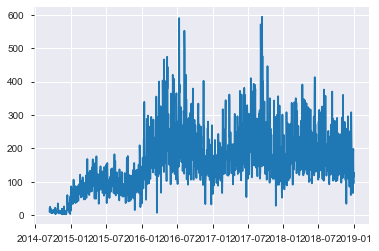

In [252]:
# default matplotlib line plot
plt.plot(registrations_per_day.LicenseIssuedDate ,registrations_per_day.issued_count)
plt.show()

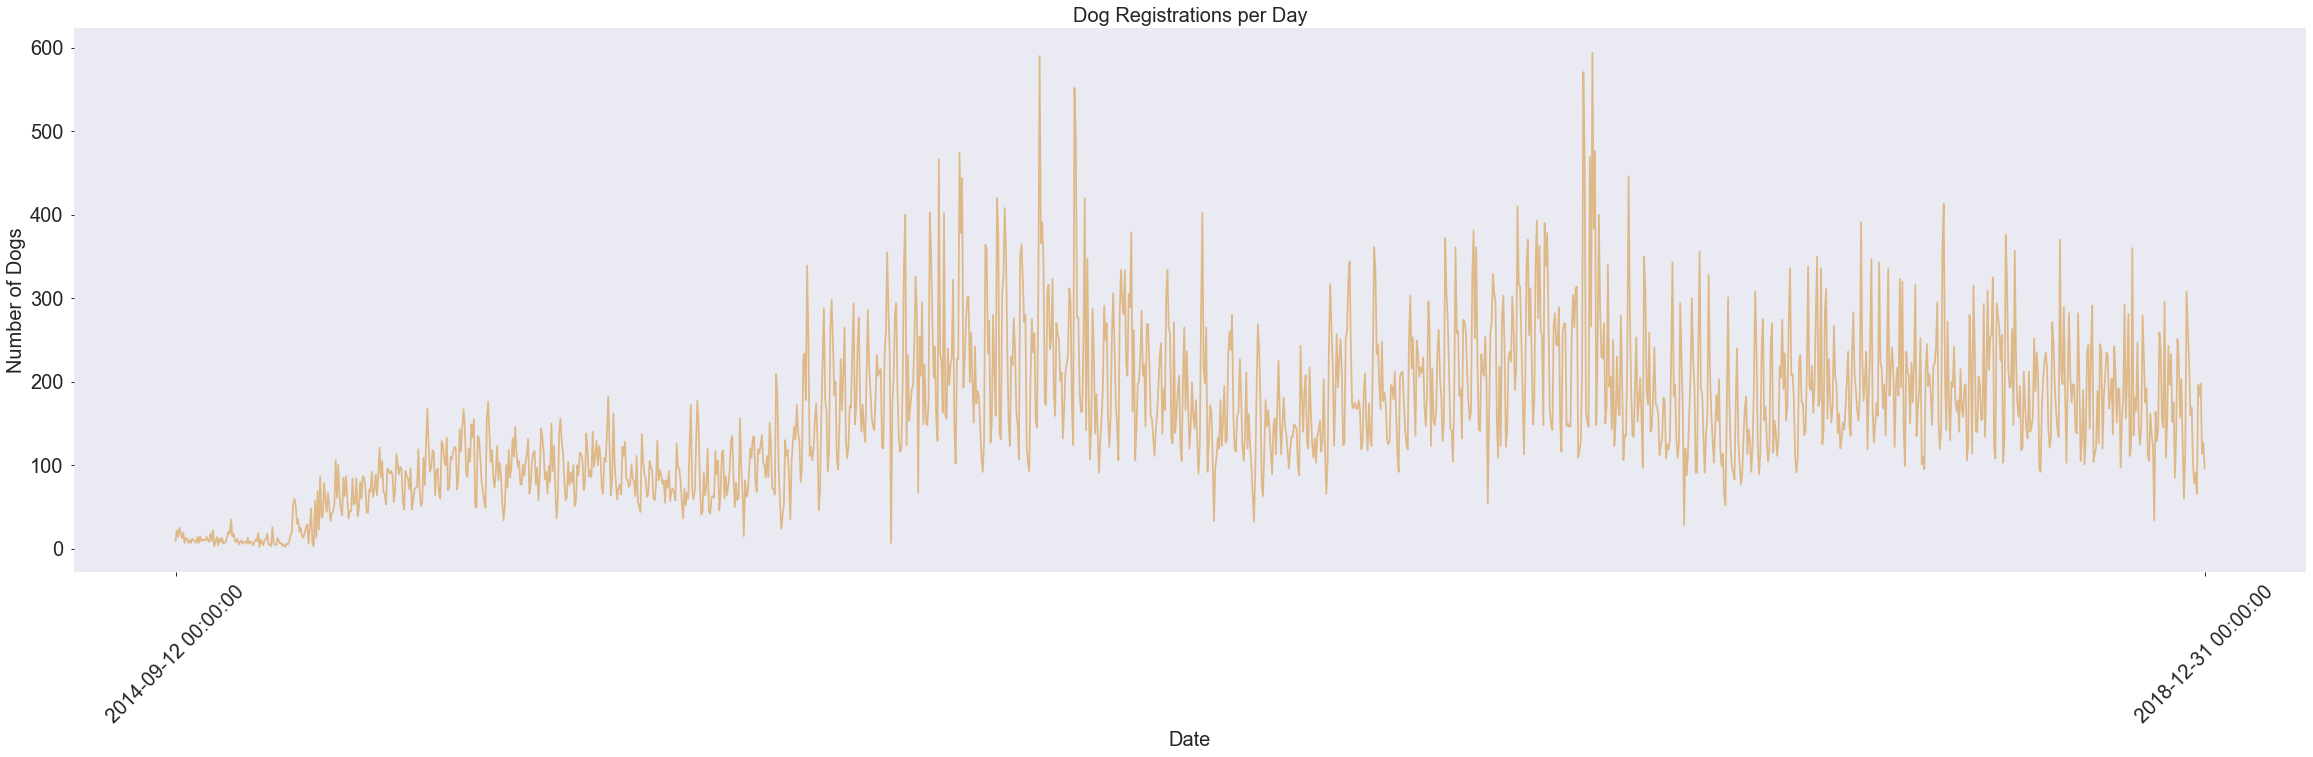

In [253]:
# fancier matplotlib line plot
f, ax = plt.subplots(figsize=(40, 10))
plt.plot(registrations_per_day.LicenseIssuedDate ,registrations_per_day.issued_count, color='burlywood')

t = [registrations_per_day['LicenseIssuedDate'].min(), registrations_per_day['LicenseIssuedDate'].max()]
plt.xticks(t,t)
plt.xticks(rotation=45) 
plt.grid(None)
plt.xlabel('Date')
plt.ylabel('Number of Dogs')
plt.title('Dog Registrations per Day')

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

plt.show()

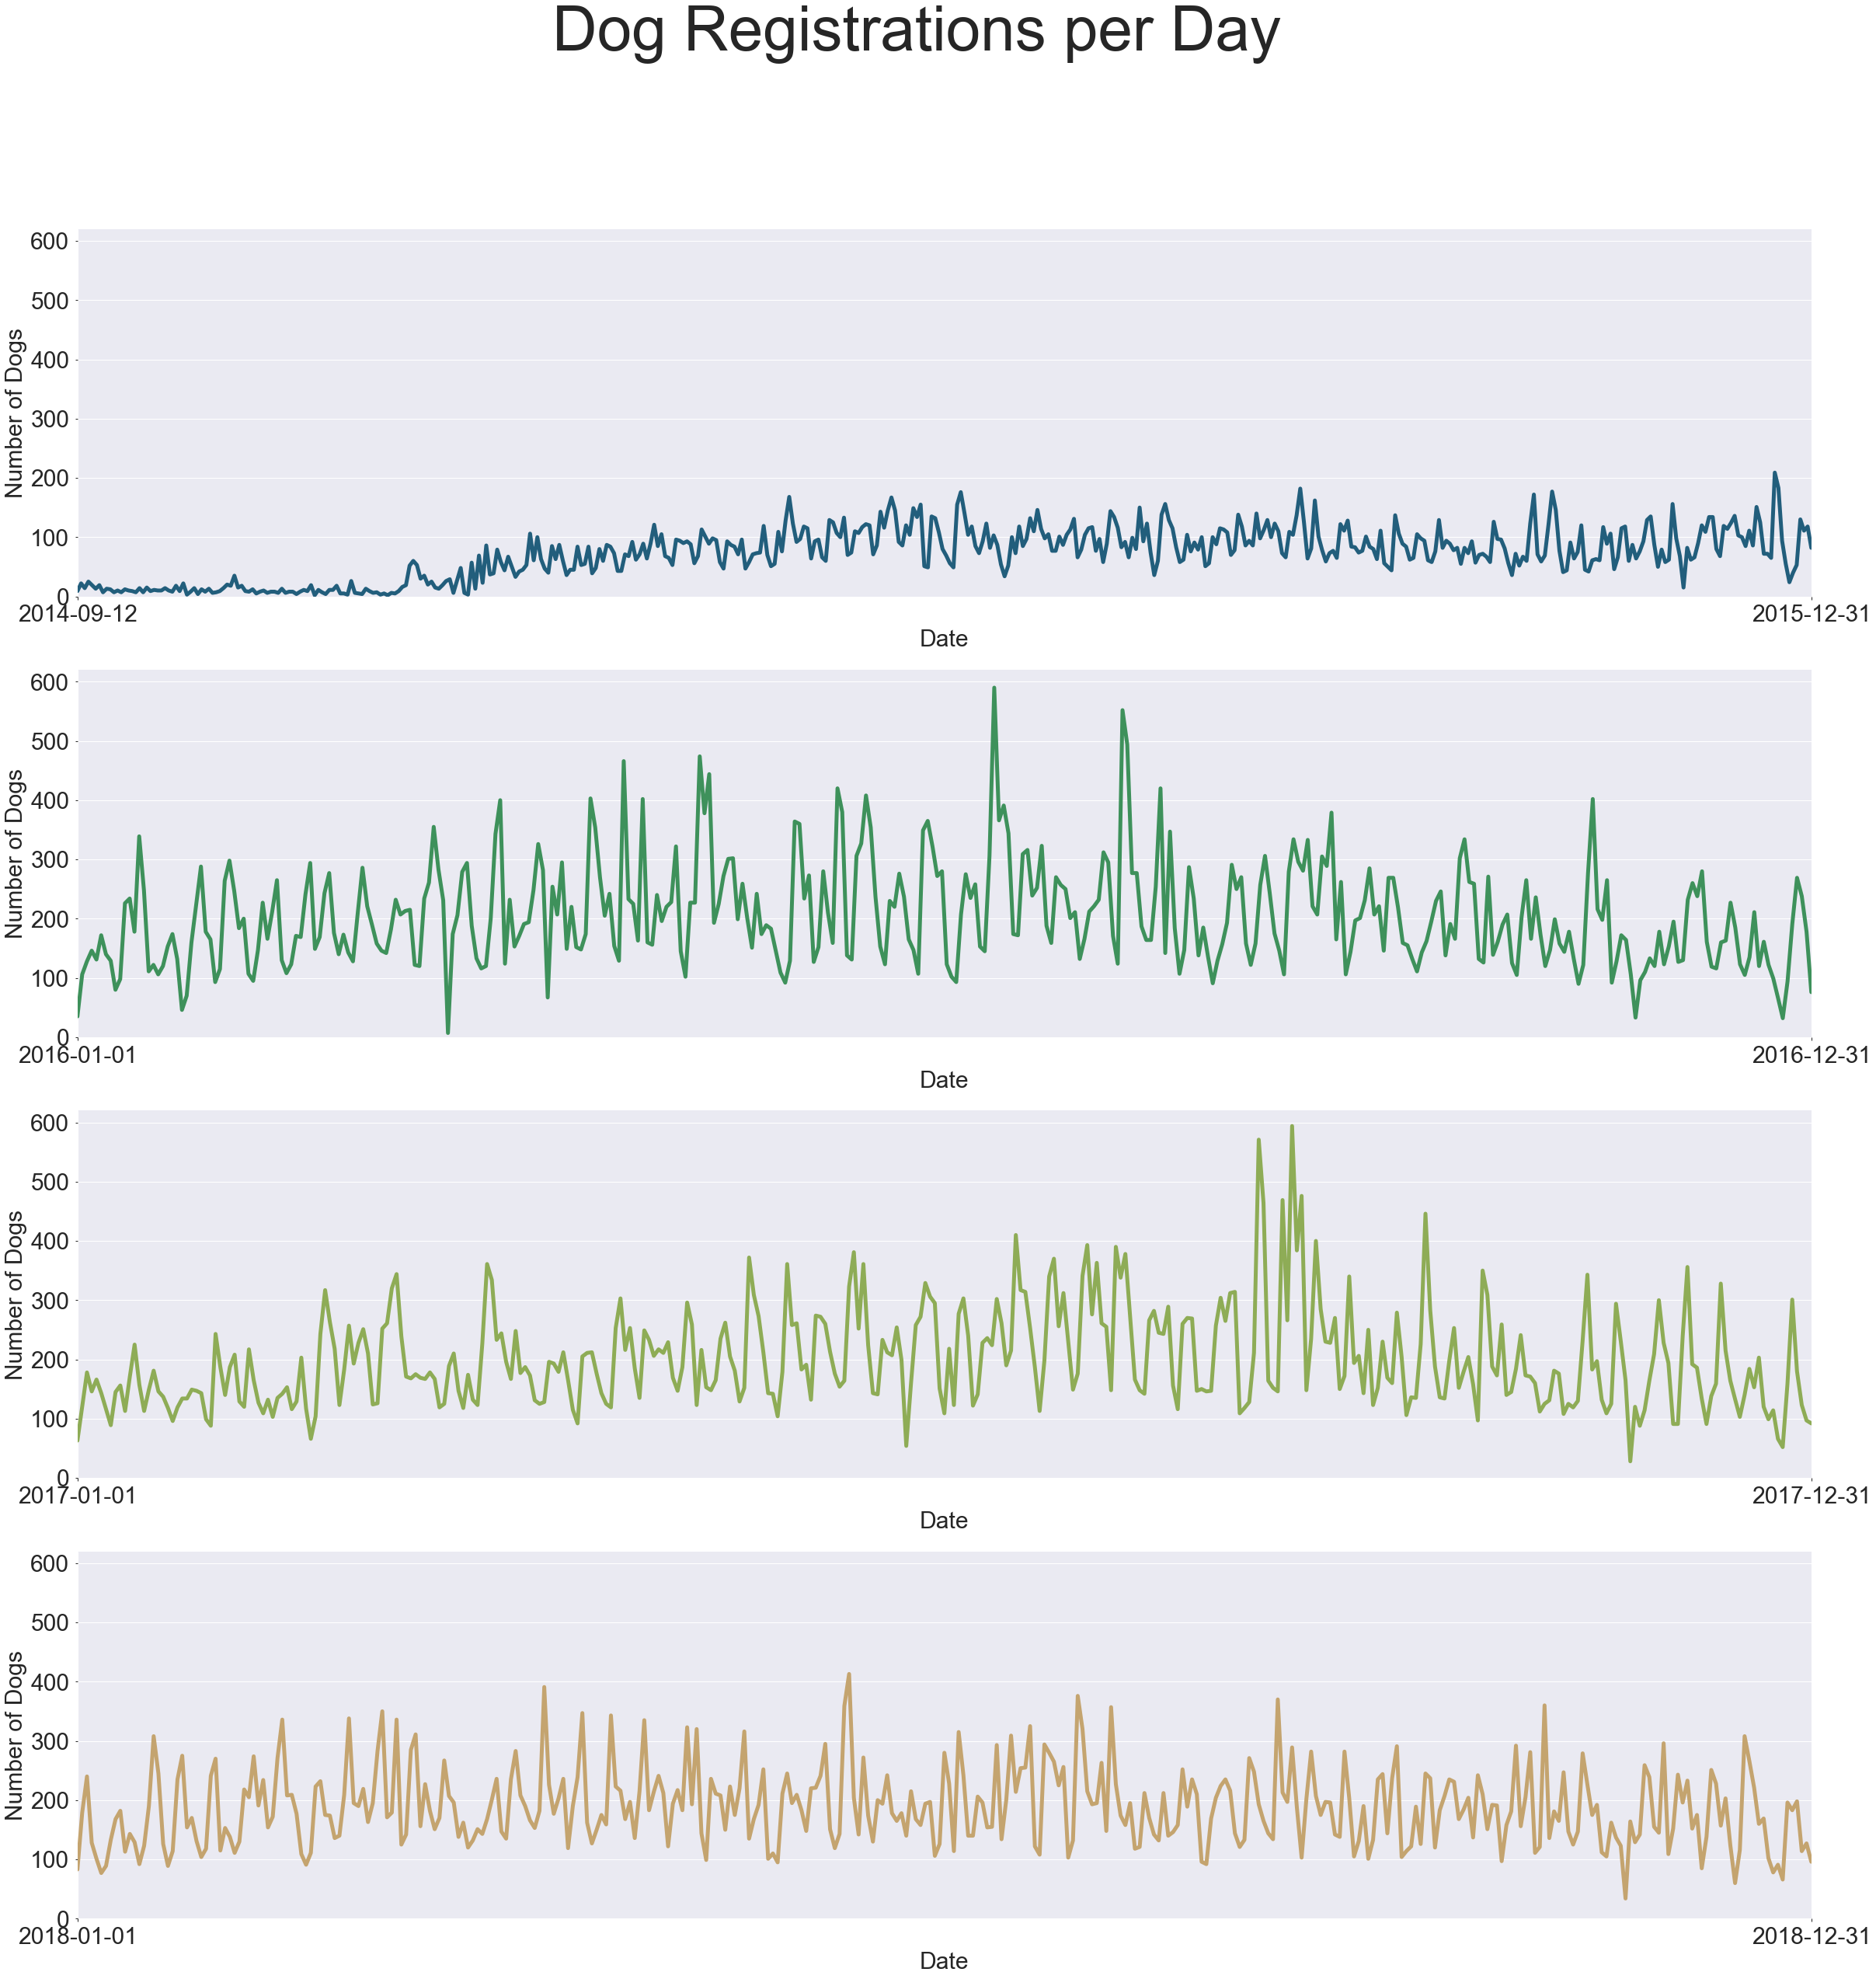

In [365]:
# plot with seaborn
clrs = sns.color_palette("gist_earth", 4)

fig, axs = plt.subplots(4,sharey=True,figsize=(40, 40))
fig.suptitle('Dog Registrations per Day', fontsize=80)
# plot 201
sns.lineplot(x=registrations_per_day.LicenseIssuedDate[registrations_per_day['LicenseIssuedDate']<'2016-01-01'] , 
             y=registrations_per_day.issued_count[registrations_per_day['LicenseIssuedDate']<'2016-01-01'], 
             data=registrations_per_day, color=clrs[0],linewidth=5,
             ax=axs[0])


sns.lineplot(x=registrations_per_day.LicenseIssuedDate[(registrations_per_day['LicenseIssuedDate']<'2017-01-01') & 
            (registrations_per_day['LicenseIssuedDate']>'2015-12-31')], 
             y=registrations_per_day.issued_count[(registrations_per_day['LicenseIssuedDate']<'2017-01-01') & 
            (registrations_per_day['LicenseIssuedDate']>'2015-12-31')],
             data=registrations_per_day,color=clrs[1],linewidth=5,
             ax=axs[1])

sns.lineplot(x=registrations_per_day.LicenseIssuedDate[(registrations_per_day['LicenseIssuedDate']<'2018-01-01') & 
            (registrations_per_day['LicenseIssuedDate']>'2016-12-31')], 
             y=registrations_per_day.issued_count[(registrations_per_day['LicenseIssuedDate']<'2018-01-01') & 
            (registrations_per_day['LicenseIssuedDate']>'2016-12-31')],
             data=registrations_per_day,color=clrs[2], linewidth=5,
             ax=axs[2])

sns.lineplot(x=registrations_per_day.LicenseIssuedDate[(registrations_per_day['LicenseIssuedDate']<'2019-01-01') & 
            (registrations_per_day['LicenseIssuedDate']>'2017-12-31')], 
             y=registrations_per_day.issued_count[(registrations_per_day['LicenseIssuedDate']<'2019-01-01') & 
            (registrations_per_day['LicenseIssuedDate']>'2017-12-31')],
             data=registrations_per_day,color=clrs[3], linewidth=5,
             ax=axs[3])




for i in range(4):
    axs[i].autoscale(enable=True, axis='both', tight=True)
    axs[i].set_xlabel('Date', fontsize=30)
    axs[i].set_ylabel('Number of Dogs', fontsize=30)
    xmin, xmax = axs[i].get_xlim()
    t = [xmin, xmax]
    axs[i].set_ylim([0,620])
    axs[i].set_xticks(t)
    axs[i].tick_params(labelsize=30)
# for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
#              ax.get_xticklabels() + ax.get_yticklabels()):
#     item.set_fontsize(40)

plt.show()
# axs[1].plot(x, -y)

<a href='#top of notebook'>Return to the top of the notebook.</a>

### Scatter Plot: Popularity of dog breeds 

In [92]:
# create df of count of how many times each dog name appears in the data
breed_count_df=dog_clean_df.BreedName.value_counts()
breed_count_df=breed_count_df.rename_axis('BreedName').reset_index(name='breed_count') 
breed_popularity_df=breed_count_df.sort_values(by="breed_count", ascending=False)
breed_count_df.head()

,BreedName,breed_count
0,Unknown,30884
1,Yorkshire Terrier,15890
2,Shih Tzu,14517
3,Chihuahua,11552
4,Maltese,8400


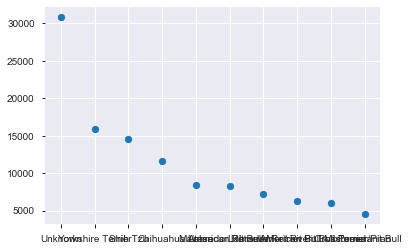

In [43]:
plt.scatter(breed_popularity_df.BreedName[0:10], breed_popularity_df.breed_count[0:10])

plt.show()

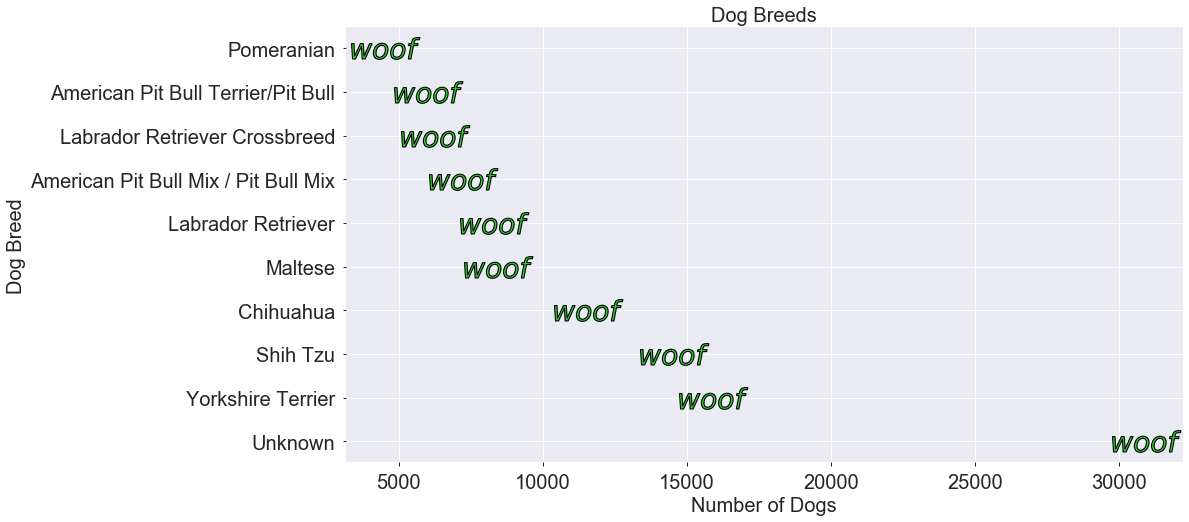

In [366]:
# fancier scatter plot with matplotlib
f, ax = plt.subplots(figsize=(15, 8))

plt.scatter( breed_popularity_df.breed_count[0:10],breed_popularity_df.BreedName[0:10], s=5000,c='limegreen', 
     marker='$woof$', edgecolors='k', linewidth='1.1' )

plt.xlabel('Number of Dogs')
plt.ylabel('Dog Breed')
plt.title('Dog Breeds')


for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

plt.show()

No handles with labels found to put in legend.


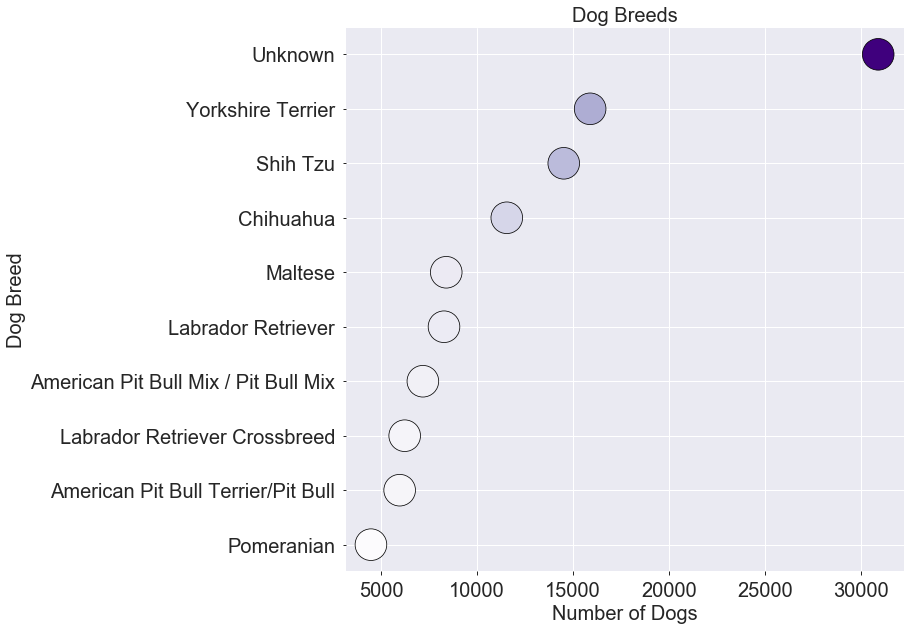

In [367]:
# seaborn scatter plot
f, ax = plt.subplots(figsize=(10, 10))

g=sns.scatterplot(x=breed_popularity_df.breed_count[0:10], y=breed_popularity_df.BreedName[0:10],
                hue=breed_popularity_df.breed_count[0:10], data=breed_popularity_df,palette="Purples",
                  s=1000, edgecolor='k', legend=False)

plt.xlabel('Number of Dogs')
plt.ylabel('Dog Breed')
plt.title('Dog Breeds')
plt.legend()
plt.gca().invert_yaxis()

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

plt.show()

<a href='#top of notebook'>Return to the top of the notebook.</a>

### Bar Chart: Popularity of dog names

In [368]:
# create df of name 
name_popularity_df=dog_clean_df.sort_values(by="name_count", ascending=False)
name_popularity_df=name_popularity_df[["AnimalName", "name_count"]].drop_duplicates()
name_popularity_df.head()

,AnimalName,name_count
41720,BELLA,2923.0
57438,MAX,2719.0
54322,CHARLIE,2136.0
247351,COCO,1990.0
110981,ROCKY,1841.0


<BarContainer object of 10 artists>

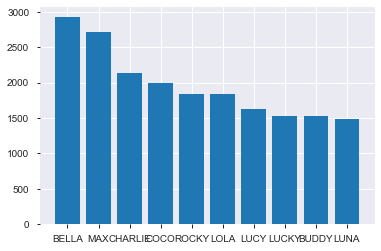

In [380]:
# default matplotlib bar chart
plt.bar(name_popularity_df.AnimalName[0:10], name_popularity_df.name_count[0:10])

plt.show()

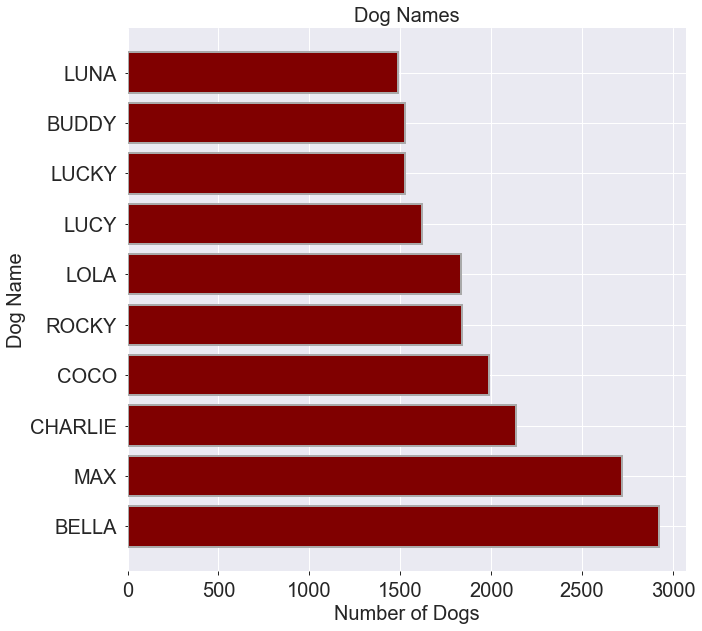

In [379]:
# fancier matplotlib barchart (horizontal)
f,ax = plt.subplots(1,1,figsize=(10,10))

ax.barh(name_popularity_df.AnimalName[0:10], name_popularity_df.name_count[0:10], color='maroon', 
        edgecolor='darkgray', linewidth='2')
plt.xlabel('Number of Dogs')
plt.ylabel('Dog Name')
plt.title('Dog Names')


for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

plt.show()

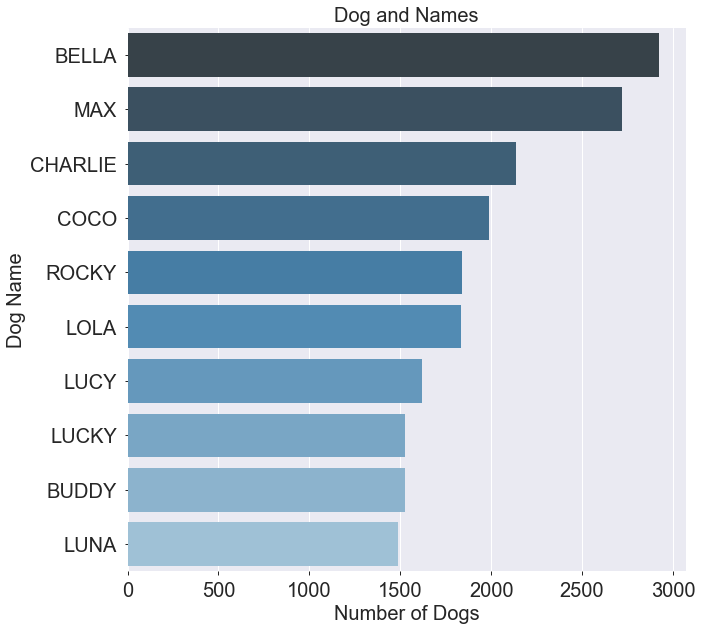

In [378]:
# seaborn barchart

f, ax = plt.subplots(figsize=(10, 10))

sns.barplot(x=name_popularity_df.name_count[0:10], y=name_popularity_df.AnimalName[0:10], data=subset_name_popularity_df, palette="Blues_d")
plt.xlabel('Number of Dogs')
plt.ylabel('Dog Name')
plt.title('Dog and Names')

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

plt.show()

<a href='#top of notebook'>Return to the top of the notebook.</a>

### Boxplot: dog ages

In [374]:
# create column with dogs age
dog_clean_df['Age']=dog_clean_df.AnimalBirthMonth*-1+2020

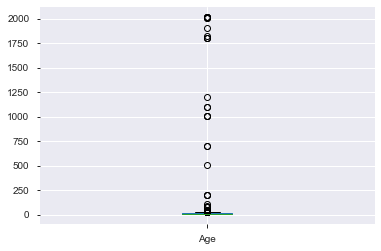

In [382]:
# default box plot of dog ages
dog_clean_df.boxplot(column='Age')
plt.show()

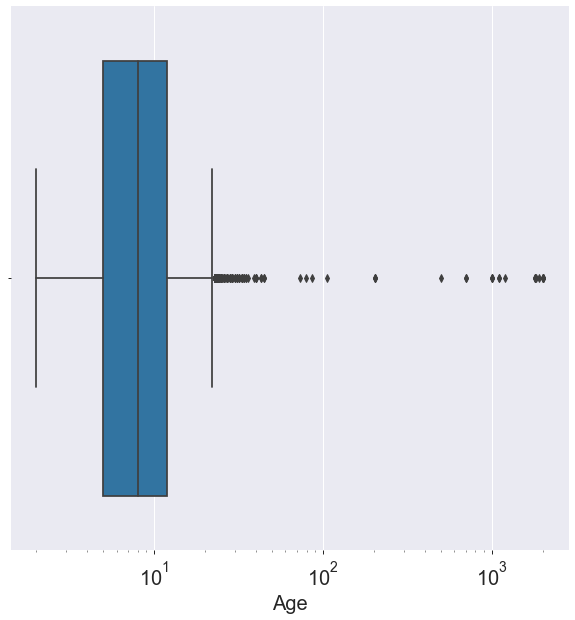

In [383]:
# fancier matplotlib boxplot
plt.rcParams.update({'font.size': 22})

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 10))


ax = sns.boxplot(x=dog_clean_df["Age"])
ax.set_xscale('log')

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

plt.show()

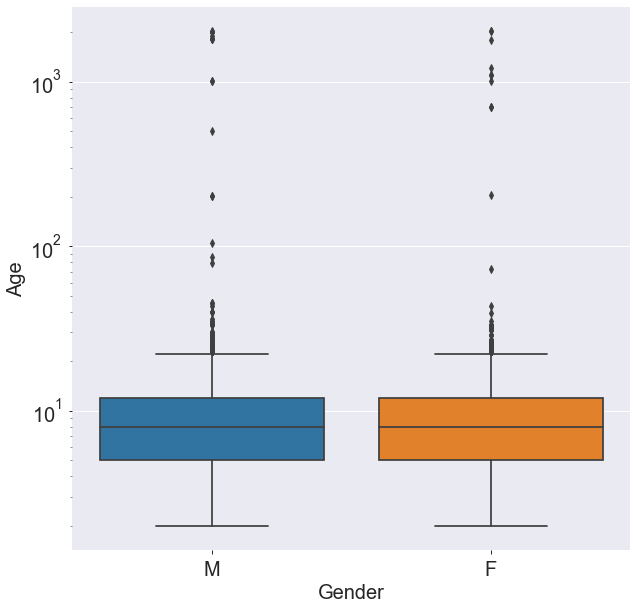

In [385]:
# seaborn boxplot

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 10))
# plot with seaborn https://seaborn.pydata.org/generated/seaborn.boxplot.html
ax = sns.boxplot(x=dog_clean_df["AnimalGender"], y=dog_clean_df["Age"])
ax.set_yscale('log')

ax.set_xlabel('Gender')

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
    
plt.show()

In [52]:
print("Median age: ", dog_clean_df["Age"].median() )
print("Mean age: ", dog_clean_df["Age"].mean() )
print("Standard deviation of age: ", dog_clean_df["Age"].std() )

Median age:  8.0
Mean age:  8.894967525365216
Standard deviation of age:  14.598601082218321


In [53]:
# in real life, would probably want to clean ages

<a href='#top of notebook'>Return to the top of the notebook.</a>

### Choropleth Map: Number of dogs by zipcode

In [82]:
# add a count of how dpgs are in each zipcode
zipcode_count_df=dog_clean_df.ZipCode.value_counts()
zipcode_count_df=zipcode_count_df.rename_axis('ZipCode').reset_index(name='zipcode_count') 
zipcode_count_df=zipcode_count_df.sort_values(by="ZipCode")
zipcode_count_df.head()

,ZipCode,zipcode_count
389,121,1
337,1135,2
241,1175,4
359,1305,1
316,6403,2


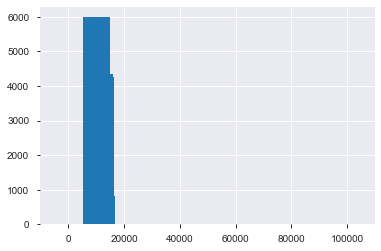

In [83]:
# bar plot or x,y plot

plt.bar(zipcode_count_df.ZipCode, zipcode_count_df.zipcode_count)

plt.show()

In [26]:
# That plot is not very good. We could make a bette bar plot but let's do something a little but fancy!

# Let's make a choropleth map! (what we need geopandas for)

In [28]:
# load in a shapefile from NYC data website for map of NYC broken down by zipcode 
# (https://data.cityofnewyork.us/widgets/i8iw-xf4u)
map_df = gpd.read_file("ZIP_CODE_040114.shp")

# view df
map_df.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.2699...,NY,Queens,36,081,http:/...,0.0,0.0,POLYGO...
1,11213,0,Brooklyn,62426.0,2.9631...,NY,Kings,36,047,http:/...,0.0,0.0,POLYGO...
2,11212,0,Brooklyn,83866.0,4.1972...,NY,Kings,36,047,http:/...,0.0,0.0,POLYGO...
3,11225,0,Brooklyn,56527.0,2.3698...,NY,Kings,36,047,http:/...,0.0,0.0,POLYGO...
4,11218,0,Brooklyn,72280.0,3.6868...,NY,Kings,36,047,http:/...,0.0,0.0,POLYGO...


In [29]:
# what are are the types of the entries
map_df.dtypes

ZIPCODE         object
BLDGZIP         object
PO_NAME         object
POPULATION     float64
AREA           float64
STATE           object
COUNTY          object
ST_FIPS         object
CTY_FIPS        object
URL             object
SHAPE_AREA     float64
SHAPE_LEN      float64
geometry      geometry
dtype: object

In [30]:
# rename ZIPCODE column to ZipCode to match dog_clean_df 
map_df = map_df.rename(index=str, columns={'ZIPCODE': 'ZipCode'})

# view df
map_df.head()

,ZipCode,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.2699...,NY,Queens,36,081,http:/...,0.0,0.0,POLYGO...
1,11213,0,Brooklyn,62426.0,2.9631...,NY,Kings,36,047,http:/...,0.0,0.0,POLYGO...
2,11212,0,Brooklyn,83866.0,4.1972...,NY,Kings,36,047,http:/...,0.0,0.0,POLYGO...
3,11225,0,Brooklyn,56527.0,2.3698...,NY,Kings,36,047,http:/...,0.0,0.0,POLYGO...
4,11218,0,Brooklyn,72280.0,3.6868...,NY,Kings,36,047,http:/...,0.0,0.0,POLYGO...


In [31]:
# we need to recast ZipCode in the map_df to an integer type so we can merge the two dfs together
map_df['ZipCode']=map_df['ZipCode'].astype(int)

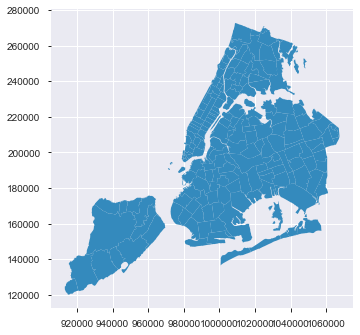

In [32]:
# test plot without data
map_df.plot()

In [33]:
# count number of dogs in each zipcode
zipcode_dog_counts=dog_clean_df.ZipCode.value_counts()
zipcode_dog_counts_df=zipcode_dog_counts.rename_axis('ZipCode').reset_index(name='counts')

In [34]:
# view new df
zipcode_dog_counts_df.head()

,ZipCode,counts
0,10025,5992
1,10023,4759
2,10024,4700
3,11201,4341
4,10128,4325


In [35]:
# check types 
zipcode_dog_counts_df.dtypes

ZipCode    int64
counts     int64
dtype: object

In [36]:
# create new dataframe that has all the info from map_df and adds the count of dogs per zipcode, merging on ZipCode
merged_df = map_df.merge(zipcode_dog_counts_df,on='ZipCode',how='left')


In [37]:
# drop any na values for plotting purposes
merged_df = merged_df.dropna()

In [38]:
# check merged_df
merged_df.head()

,ZipCode,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,counts
0,11436,0,Jamaica,18681.0,2.2699...,NY,Queens,36,081,http:/...,0.0,0.0,POLYGO...,251.0
1,11213,0,Brooklyn,62426.0,2.9631...,NY,Kings,36,047,http:/...,0.0,0.0,POLYGO...,827.0
2,11212,0,Brooklyn,83866.0,4.1972...,NY,Kings,36,047,http:/...,0.0,0.0,POLYGO...,870.0
3,11225,0,Brooklyn,56527.0,2.3698...,NY,Kings,36,047,http:/...,0.0,0.0,POLYGO...,1151.0
4,11218,0,Brooklyn,72280.0,3.6868...,NY,Kings,36,047,http:/...,0.0,0.0,POLYGO...,2177.0


In [39]:
# find maximum number of dogs in a zipcode
merged_df.counts.max()

5992.0

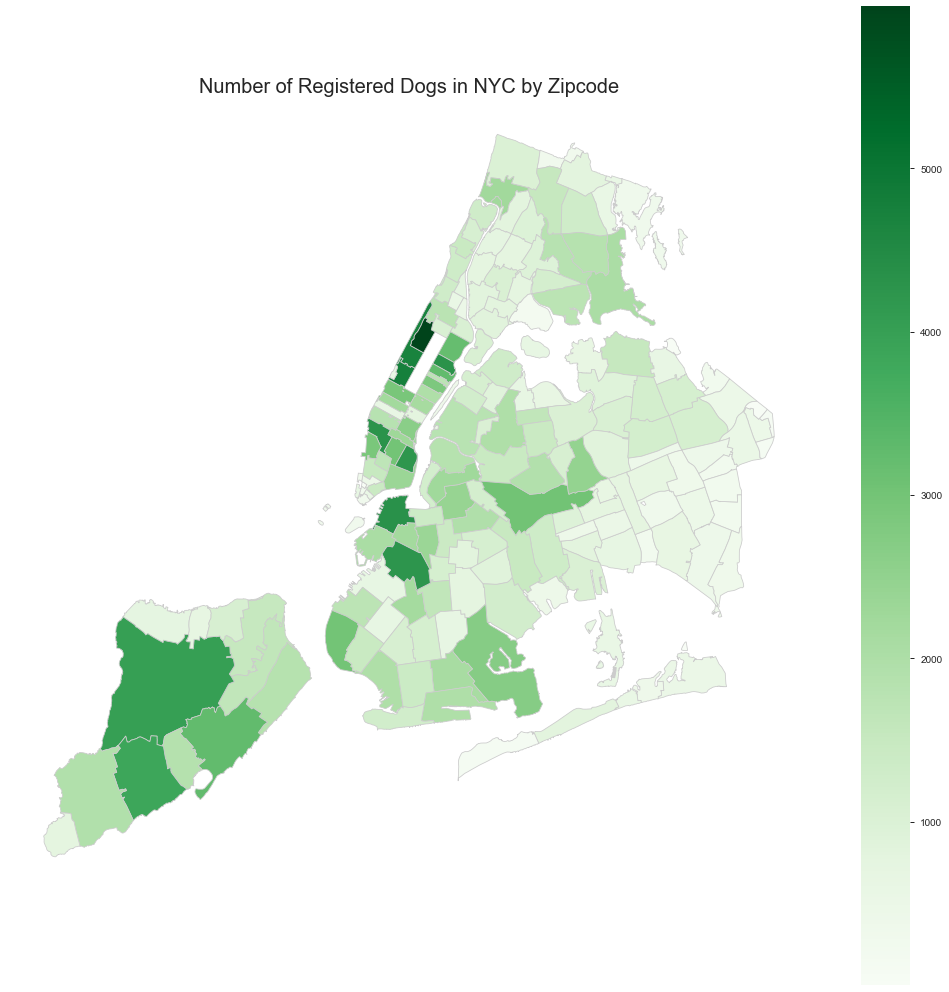

In [40]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'counts'

# set the range for the choropleth
vmin, vmax = 0, 6000

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(18, 18))

merged_df.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

plt.title('Number of Registered Dogs in NYC by Zipcode', size=20)
plt.axis('off')
plt.show()

__Why do some places have very few dogs in Manhattan?__

There are ~40 buildings with their own zipcode in Manhattan so that could be the reason for that chunck of white. But would need to look into it further.

<h1><center>That's it!</center></h1>